In [3]:
#Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings("ignore")


In [4]:
#Load datset
df = pd.read_csv("Mall Customer Dataset.csv")

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
df.shape

(200, 5)

In [9]:
df.rename(columns={'Annual Income (k$)':'AnnualIncome','Spending Score (1-100)':'SpendingScore' }, inplace = True)

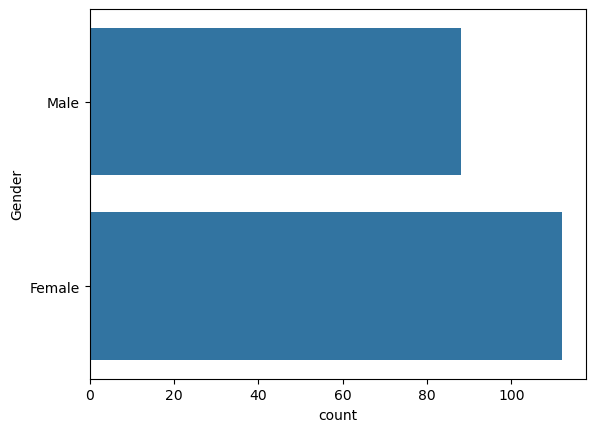

In [10]:
sns.countplot(df.Gender)
plt.show()

In [11]:
#Data preprocessing
#Missing values
df.isnull().sum()

CustomerID       0
Gender           0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64

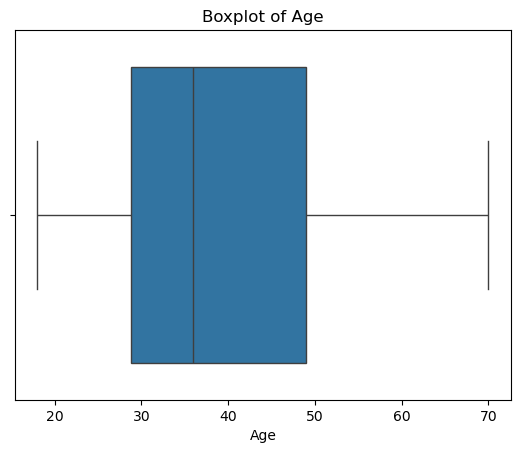

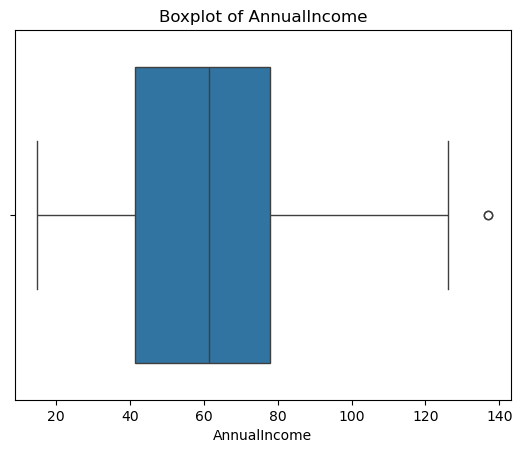

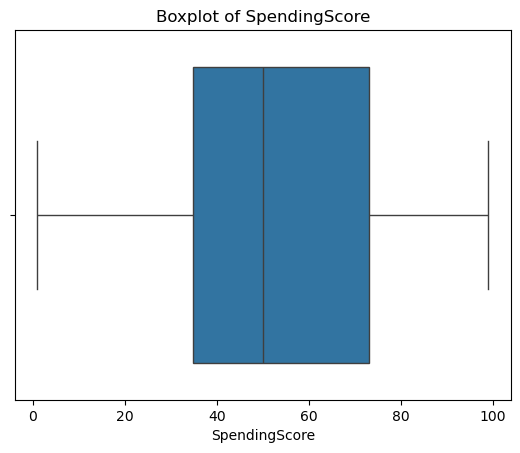

In [12]:
#outliers
for col in ['Age', 'AnnualIncome', 'SpendingScore']:
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [13]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [14]:
#Encode categorial value
#from sklearn.preprocessing import LabelEncoder
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40
...,...,...,...,...,...
195,196,1,35,120,79
196,197,1,45,126,28
197,198,0,32,126,74
198,199,0,32,137,18


In [15]:
#Normalize Feature
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(df)

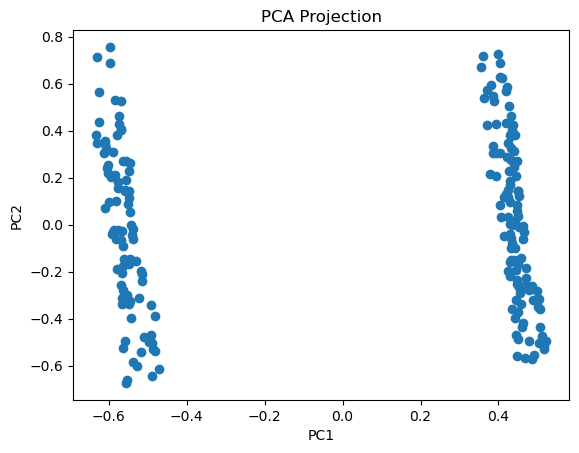

In [16]:
#PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(x_scaled)

plt.scatter(X_pca[:,0], X_pca[:,1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Projection")
plt.show()

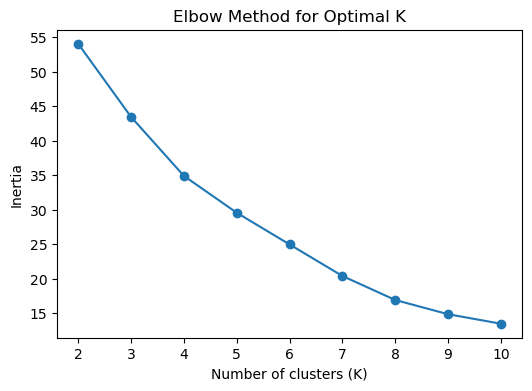

In [17]:
# Elbow Method for optimal K
inertia = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(x_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()

In [18]:
# Silhouette Score for optimal K
sil_scores = []
K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(x_scaled)
    score = silhouette_score(x_scaled, labels)
    sil_scores.append(score)
print(f'Silhouette Score for {k} clusters: {score:.3f}')


Silhouette Score for 10 clusters: 0.421


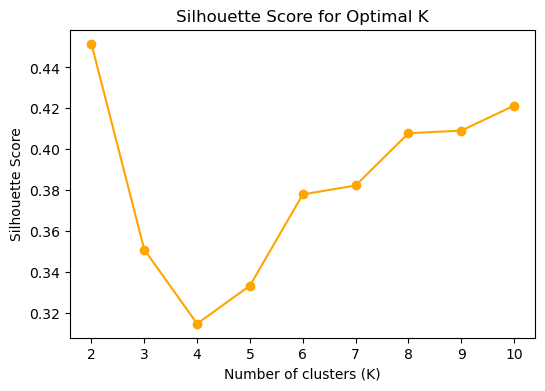

In [19]:
plt.figure(figsize=(6, 4))
plt.plot(K_range, sil_scores, marker='o', color='orange')
plt.xlabel("Number of clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Optimal K")
plt.show()

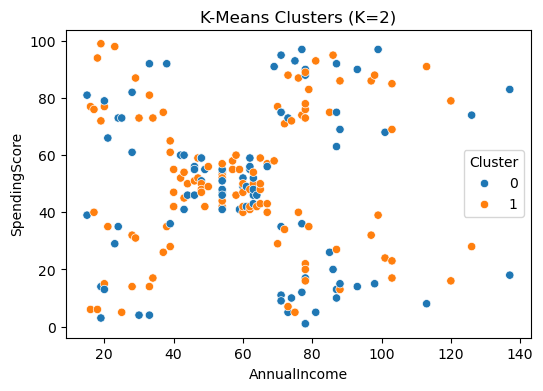

In [20]:
# Apply K-Means with chosen K
optimal_k = sil_scores.index(max(sil_scores)) + 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(x_scaled)

# Visualize clusters (Annual Income vs Spending Score)
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='AnnualIncome', y='SpendingScore',
                hue='Cluster', palette='tab10')
plt.title(f"K-Means Clusters (K={optimal_k})")
plt.show()

In [21]:
# DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(x_scaled)

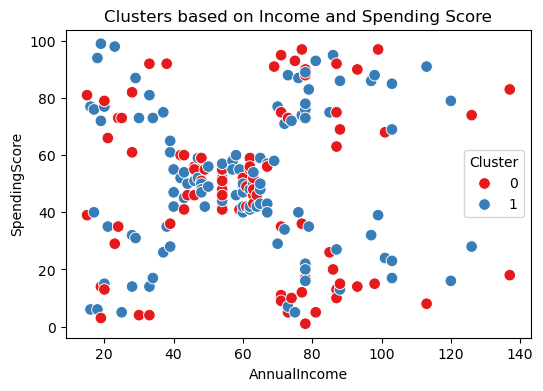

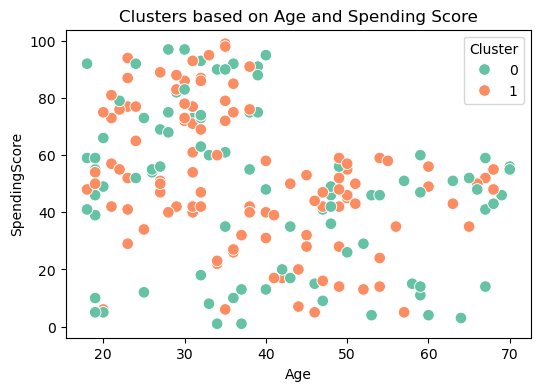

In [22]:
# Scatter Plot
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='AnnualIncome', y='SpendingScore',
                hue='Cluster', palette='Set1', s=70)
plt.title(f"Clusters based on Income and Spending Score")
plt.show()

plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='Age', y='SpendingScore', hue='Cluster', palette='Set2', s=70)
plt.title('Clusters based on Age and Spending Score')
plt.show()

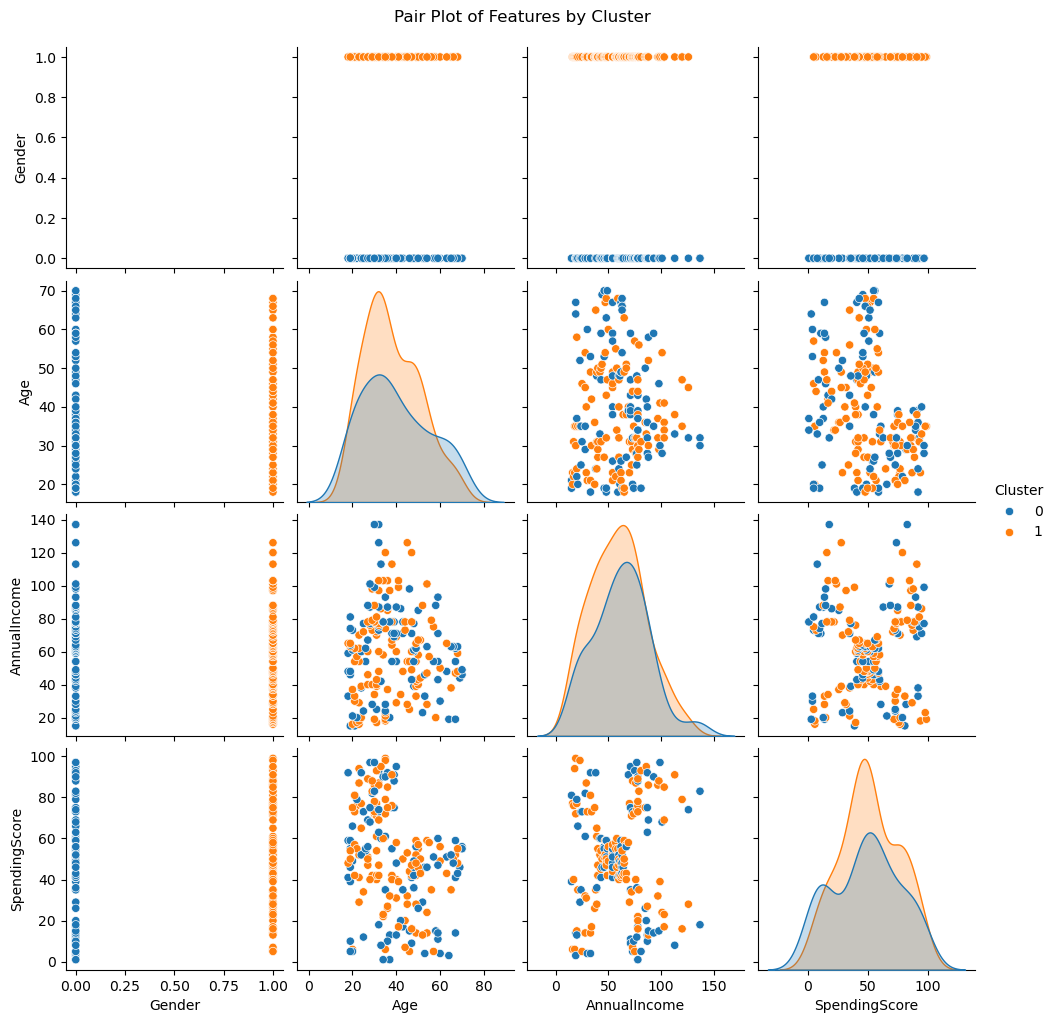

In [23]:
# Pair Plot
sns.pairplot(df[['Gender', 'Age', 'AnnualIncome',
                 'SpendingScore', 'Cluster']],
             hue='Cluster', palette='tab10', diag_kind='kde')
plt.suptitle("Pair Plot of Features by Cluster", y=1.02)
plt.show()

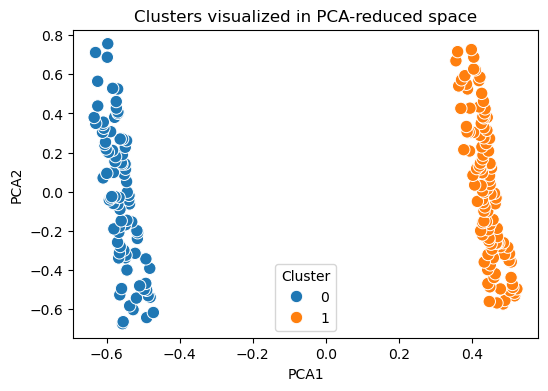

In [24]:
# PCA for 2D visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(x_scaled)
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(6, 4))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='tab10', s=80)
plt.title("Clusters visualized in PCA-reduced space")
plt.show()

In [25]:
# Interpret Segments
cluster_summary = df.groupby('Cluster').agg({
    'Age': 'mean',
    'AnnualIncome': 'mean',
    'SpendingScore': 'mean',
    'Gender': lambda x: 'Male' if x.mean() < 0.5 else 'Female'
}).reset_index()

print(cluster_summary)

   Cluster        Age  AnnualIncome  SpendingScore  Gender
0        0  39.806818     62.227273      48.511364    Male
1        1  38.098214     59.250000      51.526786  Female


In [26]:
# Business Labels
# Example mapping (adjust after seeing summary stats)
cluster_labels = {
    0: 'High Income, Low Spend',
    1: 'Young Loyalists',
    2: 'Budget-Conscious Shoppers',
    3: 'High Value Customers',
    4: 'Casual Spenders'
}

df['Segment'] = df['Cluster'].map(cluster_labels)

In [27]:
# Get mean stats for each cluster
cluster_summary = df.groupby('Segment').agg({
    'Age': 'mean',
    'AnnualIncome': 'mean',
    'SpendingScore': 'mean',
    'CustomerID': 'count'
}).reset_index().rename(columns={'CustomerID': 'Customer Count'})

print(cluster_summary)

                  Segment        Age  AnnualIncome  SpendingScore  \
0  High Income, Low Spend  39.806818     62.227273      48.511364   
1         Young Loyalists  38.098214     59.250000      51.526786   

   Customer Count  
0              88  
1             112  


In [28]:
marketing_actions = {
    'Luxury Enthusiasts': "VIP events, premium membership, luxury promotions",
    'Cautious Affluents': "High-value incentives, prestige marketing",
    'Value Seekers': "Bundle deals, loyalty points, seasonal sales",
    'Selective Premiums': "Premium practical products, curated catalogs",
    'Young Loyalists': "Social media campaigns, flash sales, gamified loyalty"
}

df['Marketing_Action'] = df['Segment'].map(marketing_actions)

In [29]:
#Save and Load trained Kmeans
import pickle
pickle.dump(kmeans,open("kmeans.pkl",'wb'))
kmeans = pickle.load(open("kmeans.pkl",'rb'))